In [1]:
import regex as re
import numpy as np
from statistics import mean, stdev
import matplotlib
import random
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#from bento_bench import bar_plot, parse_elapsed_secs, get_avg_from_table_str, set_size
import pandas as pd
import json
import os
import seaborn as sns
import dpfs
from dpfs import *
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    #"pgf.texsystem": "pdflatex",
    "font.family": "serif",
    #"font.serif": 'DejaVu Serif',
    #'text.usetex': False,
#     'pgf.rcfonts': False,
    "font.size": 18,
    #"font.weight": "bold",
    'ps.useafm': True,
    "pdf.use14corefonts": True,
    "text.usetex": True,
})

TARGET = "./thesis/"
OUT = TARGET + "/out/"

# Read the data

In [2]:
# fio data
# Host-NFS (including MP)
df = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1", "2", "4", "8"], "Host-NFS", TARGET+"/host-NFS/")
s = parse_fio(["randread", "randwrite"], ["1m"],
               ['128'],
               ["1"], "Host-NFS", TARGET+"/host-NFS/")
df = pd.concat((s, df), ignore_index=True)

# DPFS-NULL-pre (including MP)
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1", "2", "4", "8"], "DPFS-NULL-pre", TARGET+"/DPFS-NULL-pre/")
df = pd.concat((s, df), ignore_index=True)

# DPFS-NFS-pre
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "DPFS-NFS-pre", TARGET+"/DPFS-NFS-pre/")
df = pd.concat((s, df), ignore_index=True)

# DPFS-NFS-post
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "DPFS-NFS-post", TARGET+"/DPFS-NFS-post/")
df = pd.concat((s, df), ignore_index=True)

# DPFS-URING-tmpfs-waiting
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "DPFS-URING-tmpfs-waiting", TARGET+"/DPFS-URING-tmpfs-waiting-new/")
df = pd.concat((s, df), ignore_index=True)
# DPFS-URING-tmpfs-polling
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "DPFS-URING-tmpfs-polling", TARGET+"/DPFS-URING-tmpfs-polling-new/")
df = pd.concat((s, df), ignore_index=True)

# Host-NFS-Ceph
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "Host-NFS-Ceph", TARGET+"/host-NFS-Ceph/")
df = pd.concat((s, df), ignore_index=True)

# DPFS-URING-Ceph-polling
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "DPFS-URING-Ceph-polling", TARGET+"/DPFS-URING-Ceph-polling/")
df = pd.concat((s, df), ignore_index=True)

# DPFS-RVFS-null-T1
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "DPFS-RVFS-null", TARGET+"/DPFS-RVFS-null-T1-polling/")
df = pd.concat((s, df), ignore_index=True)

# DPFS-RVFS-Ceph-T1
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "DPFS-RVFS-Ceph-T1", TARGET+"/DPFS-RVFS-Ceph-T1-polling/")
df = pd.concat((s, df), ignore_index=True)

# DPFS-RVFS-Ceph-T2
s = parse_fio(["randread", "randwrite"], ["4k", "16k", "64k"],
               ["1", "2", "4", "8", "16", "32", "64", '128'],
               ["1"], "DPFS-RVFS-Ceph-T2", TARGET+"/DPFS-RVFS-Ceph-T2-polling/")
df = pd.concat((s, df), ignore_index=True)

df

,conf,RW,BS,QD,P,IOPS_avg,IOPS_stdev,clat_avg,clat_stdev,bw_avg,bw_stdev
0,DPFS-RVFS-Ceph-T2,randread,4k,1,1,3436.60,47.46,285.89,82.98,13.424307,0.185371
1,DPFS-RVFS-Ceph-T2,randread,4k,2,1,6319.68,128.39,309.30,92.14,24.686309,0.501523
2,DPFS-RVFS-Ceph-T2,randread,4k,4,1,12586.23,145.08,312.65,98.93,49.165029,0.566729
3,DPFS-RVFS-Ceph-T2,randread,4k,8,1,20922.87,308.63,377.94,136.95,81.730010,1.205557
4,DPFS-RVFS-Ceph-T2,randread,4k,16,1,24452.98,538.64,650.26,171.70,95.519492,2.103994
...,...,...,...,...,...,...,...,...,...,...,...
813,Host-NFS,randwrite,64k,64,8,18295.35,73.19,27978.36,1419.04,1143.000000,4.570000
814,Host-NFS,randwrite,64k,128,1,18263.11,432.01,6997.84,585.82,1141.450000,27.000000
815,Host-NFS,randwrite,64k,128,2,19550.17,310.92,13084.44,613.24,1221.890000,19.430000
816,Host-NFS,randwrite,64k,128,4,19204.50,65.28,26655.11,640.97,1200.000000,4.080000


In [3]:
# metadata (filebench, redis, rocksdb)
df_meta = parse_metadata("host-NFS-Ceph", TARGET+"host-NFS-Ceph/")

s = parse_metadata("host-NFS", TARGET+"host-NFS/")
df_meta = pd.concat((s, df_meta), ignore_index=True)

s = parse_metadata("DPFS-KERNEL (polling)", TARGET+"DPFS-URING-Ceph-polling/")
df_meta = pd.concat((s, df_meta), ignore_index=True)
s = parse_metadata("DPFS-KERNEL (waiting)", TARGET+"DPFS-URING-Ceph-waiting/")
df_meta = pd.concat((s, df_meta), ignore_index=True)

s = parse_metadata("DPFS-RVFS-Ceph-T1-polling", TARGET+"DPFS-RVFS-Ceph-T1-polling/")
df_meta = pd.concat((s, df_meta), ignore_index=True)

s = parse_metadata("DPFS-RVFS-Ceph-T2-polling", TARGET+"DPFS-RVFS-Ceph-T2-polling/")
df_meta = pd.concat((s, df_meta), ignore_index=True)

df_meta

,conf,workload,type,avg,stdev
0,DPFS-RVFS-Ceph-T2-polling,redis,get,73.099698,2.528837
1,DPFS-RVFS-Ceph-T2-polling,redis,set,75.474904,2.158600
2,DPFS-RVFS-Ceph-T2-polling,rocksdb,fillrandom,579.110800,6.485197
3,DPFS-RVFS-Ceph-T2-polling,rocksdb,readrandom,969.585400,43.652193
4,DPFS-RVFS-Ceph-T2-polling,filebench,fileserver,5.792097,0.030295
5,DPFS-RVFS-Ceph-T2-polling,filebench,varmail,8.768312,0.234007
6,DPFS-RVFS-Ceph-T2-polling,filebench,webserver,142.887691,2.007807
7,DPFS-RVFS-Ceph-T1-polling,redis,get,74.367140,0.452447
8,DPFS-RVFS-Ceph-T1-polling,redis,set,76.654814,0.629832
9,DPFS-RVFS-Ceph-T1-polling,rocksdb,fillrandom,582.422600,4.171093


In [3]:
# multi-tenancy
df_mt = parse_fio_mt(["randread", "randwrite"],
              ["4k", "16k", "64k"], ["2", "4", "8", "16", "32", "64", '128'], ["1"],
              ["2"], ["1", "2", "4", "8"],
              "DPFS-NULL", TARGET+"/DPFS-NULL-MT/")

s = parse_fio_mt(["randread", "randwrite"],
              ["4k", "16k", "64k"], ["2", "4", "8", "16", "32", "64", '128'], ["1"],
              ["4"], ["4", "8"],
              "DPFS-NULL", TARGET+"/DPFS-NULL-MT/")
df_mt = pd.concat((s, df_mt), ignore_index=True)

s = parse_fio_mt(["randread", "randwrite"],
              ["4k", "16k", "64k"], ["2", "4", "8", "16", "32", "64", '128'], ["1"],
              ["8"], ["8"],
              "DPFS-NULL", TARGET+"/DPFS-NULL-MT/")
df_mt = pd.concat((s, df_mt), ignore_index=True)

s = parse_fio_mt(["randread", "randwrite"],
              ["4k", "16k", "64k"], ["2", "4", "8", "16", "32", "64", '128'], ["1"],
              ["4"], ["8"],
              "DPFS-KERNEL-Ceph", TARGET+"/DPFS-URING-Ceph-polling-T4-Uring3/")
df_mt = pd.concat((s, df_mt), ignore_index=True)

df_mt

,conf,RW,BS,QD,P,IOPS_avg,IOPS_stdev,clat_avg,clat_stdev,bw_avg,bw_stdev,T,MT
0,DPFS-KERNEL-Ceph,randread,4k,2,1,27091.28,602.522091,441.660000,53.871767,105.825645,2.353605,4,8
1,DPFS-KERNEL-Ceph,randread,4k,4,1,39102.28,1871.65042,770.084286,213.624664,152.744082,7.311144,4,8
2,DPFS-KERNEL-Ceph,randread,4k,8,1,44081.59,4244.238434,1768.231429,911.205443,172.194629,16.57902,4,8
3,DPFS-KERNEL-Ceph,randread,4k,16,1,40918.45,5307.405814,43111.252500,44384.759686,159.838379,20.732073,4,8
4,DPFS-KERNEL-Ceph,randread,4k,32,1,39739.25,4999.739493,52922.152500,53014.721591,155.232529,19.530191,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,DPFS-NULL,randwrite,64k,64,1,112821.85,534.508478,4535.010000,173.66472,7051.381680,33.40654,2,8
332,DPFS-NULL,randwrite,64k,128,1,64531.13,0,1978.580000,0,4033.200000,0,2,1
333,DPFS-NULL,randwrite,64k,128,1,106063.74,102.742615,2407.885000,4.857824,6628.980000,6.42053,2,2
334,DPFS-NULL,randwrite,64k,128,1,144922.30,41.945549,3524.845000,4.155843,9057.650000,2.62134,2,4


In [5]:
# latency cdf data
df_clat = parse_fio_clat(["randread", "randwrite"], ["4k"], ["16", "128"], ["1"], "DPFS-NFS-pre", TARGET+"/DPFS-NFS-pre/")

s = parse_fio_clat(["randread", "randwrite"], ["4k"], ["16", "128"], ["1"], "DPFS-NFS-post", TARGET+"/DPFS-NFS-post/")
df_clat = pd.concat((s, df_clat), ignore_index=True)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



# Systor++ experiments

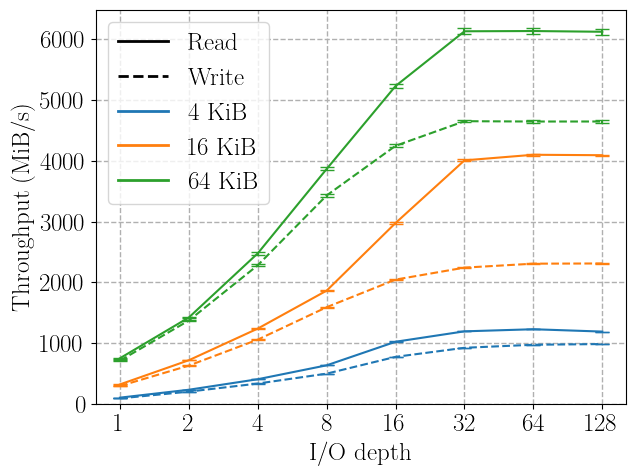

In [6]:
# Experiment SYSTOR.0 = NULL
plot_tp(df, {'DPFS-NULL-pre': 'DPFS-NULL'}, ['4k', '16k', '64k'], ['1'],
             None, {'4k': 'tab:blue', '16k': 'tab:orange', '64k': 'tab:green'}, None,
             False, OUT+"/DPFS-NULL-pre.pdf")

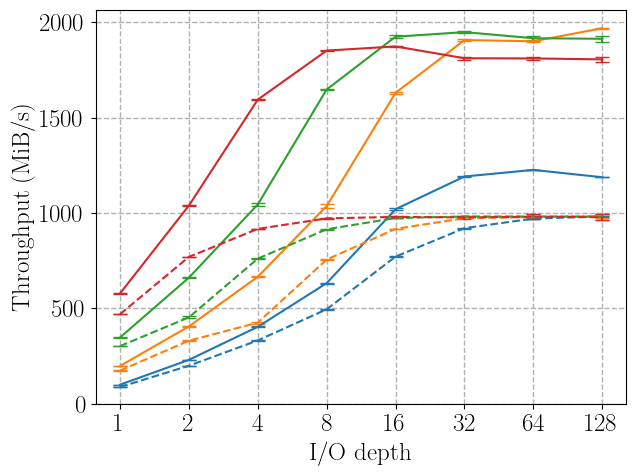

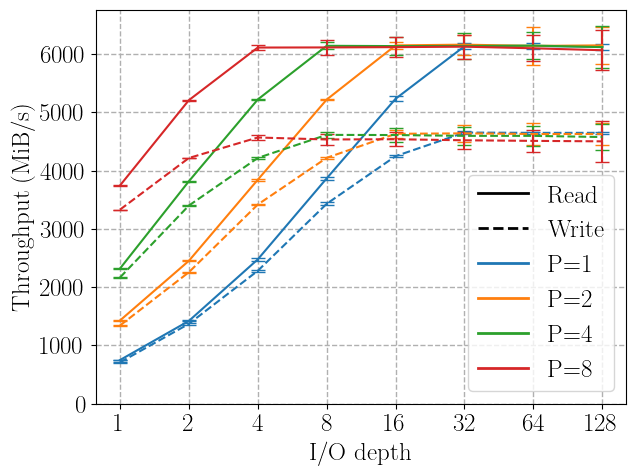

In [7]:
# Experiment SYSTOR.1 = MP
plot_tp(df, {'DPFS-NULL-pre': 'DPFS-NULL'}, ['4k'], ['1', '2', '4', '8'],
             None, None, {'1': 'tab:blue', '2': 'tab:orange', '4': 'tab:green', '8': 'tab:red'},
             False, OUT+"/DPFS-NULL-pre-mp-4k.pdf", legend_none=True)
plot_tp(df, {'DPFS-NULL-pre': 'DPFS-NULL'}, ['64k'], ['1', '2', '4', '8'],
             None, None, {'1': 'tab:blue', '2': 'tab:orange', '4': 'tab:green', '8': 'tab:red'},
             False, OUT+"/DPFS-NULL-pre-mp-64k.pdf")

Host-NFS read win 94.28667000662433
Host-NFS write win 55.322414609134405


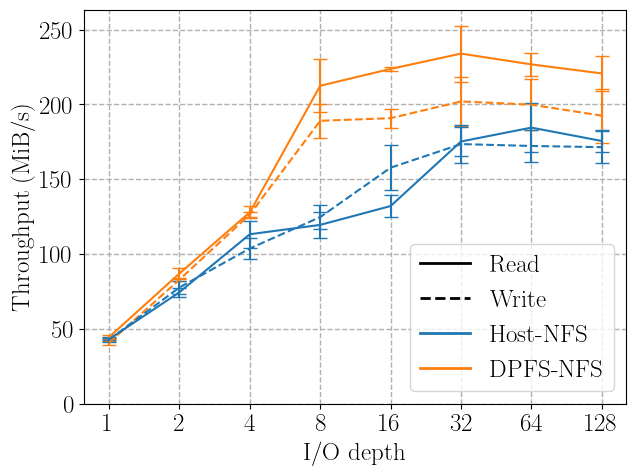

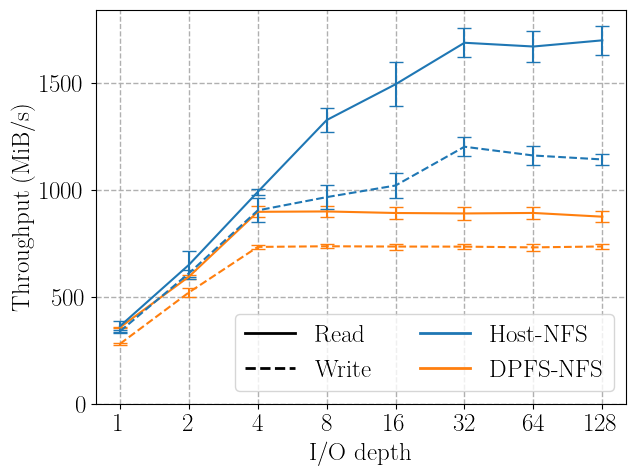

In [8]:
# Experiment SYSTOR.2 = NFS
plot_tp(df, {'DPFS-NFS-pre': 'DPFS-NFS', 'Host-NFS': 'Host-NFS'}, ['4k'], ['1'],
             {'Host-NFS': 'tab:blue', 'DPFS-NFS-pre': 'tab:orange'}, None, None,
             False, OUT+"/DPFS-NFS-pre.pdf")
# Experiment SYSTOR.3 = NFS large BS
plot_tp(df, {'DPFS-NFS-pre': 'DPFS-NFS', 'Host-NFS': 'Host-NFS'}, ['64k'], ['1'],
             {'Host-NFS': 'tab:blue', 'DPFS-NFS-pre': 'tab:orange'}, None, None,
             False, OUT+"/DPFS-NFS-pre-largebs.pdf", legend_loc='lower right', legend_ncols=2)
print("Host-NFS read win " + str((df.loc[(df['conf'] == 'Host-NFS') & (df['BS'] == '64k') & (df['QD'] == '128') & (df['P'] == '1'), 'bw_avg'].iloc[0] / 
    df.loc[(df['conf'] == 'DPFS-NFS-pre') & (df['BS'] == '64k') & (df['QD'] == '128') & (df['P'] == '1'), 'bw_avg'].iloc[0] - 1) * 100))
print("Host-NFS write win " + str((df.loc[(df['conf'] == 'Host-NFS') & (df['BS'] == '64k') & (df['QD'] == '128') & (df['P'] == '1'), 'bw_avg'].iloc[1] / 
    df.loc[(df['conf'] == 'DPFS-NFS-pre') & (df['BS'] == '64k') & (df['QD'] == '128') & (df['P'] == '1'), 'bw_avg'].iloc[1] - 1) * 100))

{'Read':              conf        RW  BS QD  P  IOPS_avg  IOPS_stdev  clat_avg  \
384  DPFS-NFS-pre  randread  4k  1  1  11391.54      338.39     82.49   
626      Host-NFS  randread  4k  1  1  11020.58      179.02     84.60   

     clat_stdev     bw_avg  bw_stdev  
384       17.54  44.498213  1.321816  
626       12.59  43.049219  0.699326  , 'Write':              conf         RW  BS QD  P  IOPS_avg  IOPS_stdev  clat_avg  \
408  DPFS-NFS-pre  randwrite  4k  1  1  10453.78      361.86     89.44   
722      Host-NFS  randwrite  4k  1  1  10959.78      479.97     84.79   

     clat_stdev     bw_avg  bw_stdev  
408       16.06  40.835166  1.413486  
722       10.59  42.811699  1.874844  }


TypeError: unhashable type: 'numpy.ndarray'

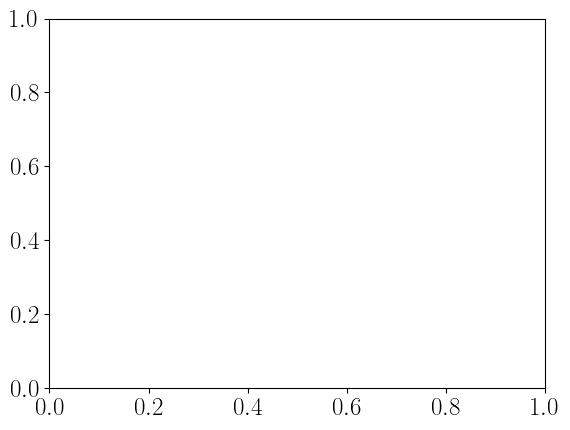

In [15]:
# Latency
s = df
def advanced_latency():
    confs = ["Host-NFS", "DPFS-NFS-pre"]
    confs_names = ["Host NFS", "DPFS-NFS"]

    fig, ax = plt.subplots()

    avg = {
        "Read": s.loc[(s['QD'] == '1') & (s['P'] == '1') & (s['BS'] == '4k') & (s['conf'].isin(confs)) & (s['RW'] == 'randread')],
        "Write": s.loc[(s['QD'] == '1') & (s['P'] == '1') & (s['BS'] == '4k') & (s['conf'].isin(confs)) & (s['RW'] == 'randwrite')],
    }
    print(avg)
    stdev = {
        "Read": s.loc[(s['QD'] == '1') & (s['P'] == '1') & (s['BS'] == '4k') & (s['conf'].isin(confs)) & (s['RW'] == 'randread'), 'clat_stdev'],
        "Write": s.loc[(s['QD'] == '1') & (s['P'] == '1') & (s['BS'] == '4k') & (s['conf'].isin(confs)) & (s['RW'] == 'randwrite'), 'clat_stdev'],
    }
    x = np.arange(len(confs))
    width = 0.235
    multiplier = 0.3
    
    for (rw, val) in avg.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, val, width, label=rw, yerr=stdev[rw], capsize=5, edgecolor='black')
        #ax.bar_label(rects, padding=-5, fmt='%.1fµs')
        multiplier += 1
        
    null_avg = {
        "Read": s.loc[(s['QD'] == '1') & (s['P'] == '1') & (s['BS'] == '4k') & (s['conf'] == 'DPFS-NULL-pre') & (s['RW'] == 'randread'), 'clat_avg'],
        "Write": s.loc[(s['QD'] == '1') & (s['P'] == '1') & (s['BS'] == '4k') & (s['conf'] == 'DPFS-NULL-pre') & (s['RW'] == 'randwrite'), 'clat_avg'],
    }
    null_stdev = {
        "Read": s.loc[(s['QD'] == '1') & (s['P'] == '1') & (s['BS'] == '4k') & (s['conf'] == 'DPFS-NULL-pre') & (s['RW'] == 'randread'), 'clat_stdev'],
        "Write": s.loc[(s['QD'] == '1') & (s['P'] == '1') & (s['BS'] == '4k') & (s['conf'] == 'DPFS-NULL-pre') & (s['RW'] == 'randwrite'), 'clat_stdev'],
    }
    
    multiplier = 0.3
    colors = {"Read": 'tab:blue', "Write": 'tab:orange'}
    for (rw, val) in null_avg.items():
        offset = width * multiplier
        rects = ax.bar(1 + offset, val, yerr=null_stdev[rw], width=width, bottom=0, capsize=5, color=colors[rw], edgecolor='black')
        ax.bar_label(rects, padding=-(val*2), fmt='%.1fµs') # put at bottom
        multiplier += 1
    ax.annotate('DPFS-Null', xy=(0.95,18.8), xytext=(0.55, 6.5), arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=-0.2", facecolor='red'))
    ax.annotate('Userspace NFS\n(TCP offloaded)\n       latency', xy=(0.95,64), xytext=(0.475, 34.57), arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=-0.2", facecolor='red'), multialignment="center")
    #ax.annotate('Total latency', xy=(0.87,113.5), xytext=(0.49, 93), arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=-0.2", facecolor='red'))
    ax.annotate('52.9µs', xy=(0,0), xytext=(0.985, 62)) # libnfs
    ax.annotate('52.2µs', xy=(0,0), xytext=(1.22, 66)) # libnfs
    ax.annotate('85µs', xy=(0,0), xytext=(0.01, 35)) # NFS
    ax.annotate('71.2µs', xy=(0,0), xytext=(0.22, 35)) # NFS
    ax.annotate('91.5µs', xy=(0,0), xytext=(0.87, 94.1)) # total DPFS
    ax.annotate('95.5µs', xy=(0,0), xytext=(1.105, 98)) # total DPFS
    #ax.annotate('DPU', xy=(0,0), xytext=(1.2, 28))
    #ax.annotate('NFS', xy=(0,0), xytext=(0.95, 62))
    #ax.annotate('NFS', xy=(0,0), xytext=(1.2, 67))

    fig.tight_layout()
    ax.grid(which='major', linestyle='dashed', linewidth='1')
    ax.set_axisbelow(True)
    ax.set_ylim(top=135)
    ax.set_xticks(x+width*0.5, confs_names)
    ax.legend(loc='upper center', ncols=3)
    ax.set_ylabel("Latency (µs)")
    ax.set_xlabel("Configuration")

    plt.savefig(OUT + "4k_clat.pdf", bbox_inches="tight")
    fig.show()
    
advanced_latency()

# Thesis experiments

## Experiment 1 pre and post virtio-fs latency patch

99.9th percentile of DPFS-NFS pre-patch  randread = 768.157608ms
99.99th percentile of DPFS-NFS pre-patch  randread = 1772.597763ms
99.999th percentile of DPFS-NFS pre-patch  randread = 2908.274633ms
99.9th percentile of DPFS-NFS pre-patch  randwrite = 852.290718ms
99.99th percentile of DPFS-NFS pre-patch  randwrite = 2004.2124179999998ms
99.999th percentile of DPFS-NFS pre-patch  randwrite = 3140.361767ms
99.9th percentile of DPFS-NFS post-patch  randread = 10.765635999999999ms
99.99th percentile of DPFS-NFS post-patch  randread = 14.000758ms
99.999th percentile of DPFS-NFS post-patch  randread = 17.766479ms
99.9th percentile of DPFS-NFS post-patch  randwrite = 12.43704ms
99.99th percentile of DPFS-NFS post-patch  randwrite = 16.791272ms
99.999th percentile of DPFS-NFS post-patch  randwrite = 21.072221ms
             conf        RW  BS   QD  P  IOPS_avg  IOPS_stdev  clat_avg  \
391  DPFS-NFS-pre  randread  4k  128  1  56508.23     3045.86   2267.75   

     clat_stdev      bw_avg   bw

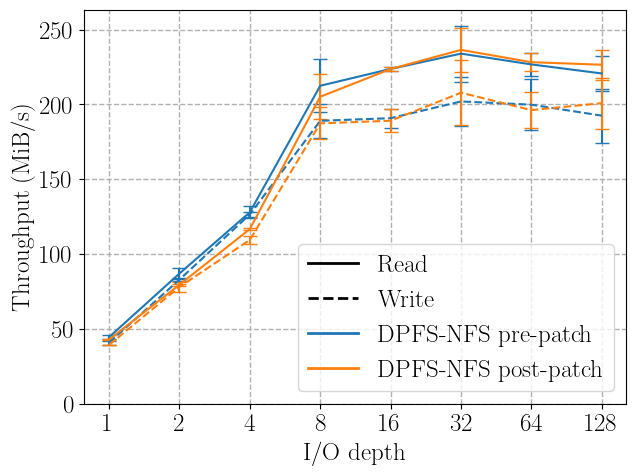

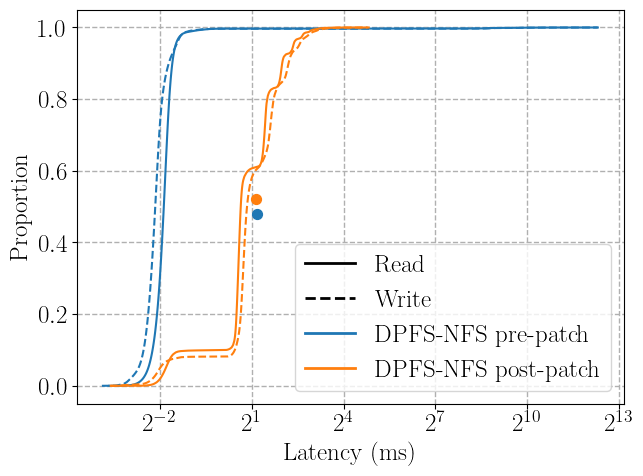

In [9]:
# Experiment 1.1 pre and post virtio-fs latency patch
plot_tp(df, {'DPFS-NFS-pre': 'DPFS-NFS pre-patch ', 'DPFS-NFS-post': 'DPFS-NFS post-patch '},
        ['4k'], ['1'],
        {'DPFS-NFS-pre': 'tab:blue', 'DPFS-NFS-post': 'tab:orange'}, None, None,
        False, OUT+"/DPFS-NFS-patch_tp.pdf")
# Experiment 1.2
plot_cdf(df_clat, {'DPFS-NFS-pre': 'DPFS-NFS pre-patch ', 'DPFS-NFS-post': 'DPFS-NFS post-patch '},
        ["randread", "randwrite"], "4k", "128", "1",
        {'DPFS-NFS-pre': 'tab:blue', 'DPFS-NFS-post': 'tab:orange'}, OUT+"/DPFS-NFS-patch_cdf.pdf")

print(df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-NFS-pre') & (df['QD'] == '128')])

In [10]:
pre_read_avg = df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-NFS-pre') & (df['QD'] == '128'), 'clat_avg']
post_read_avg = df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-NFS-post') & (df['QD'] == '128'), 'clat_avg']
pre_write_avg = df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-NFS-pre') & (df['QD'] == '128'), 'clat_avg']
post_write_avg = df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-NFS-post') & (df['QD'] == '128'), 'clat_avg']

print(str(pre_read_avg.iloc[0] / post_read_avg.iloc[0] * 100 - 100) + "%")
print(str(pre_write_avg.iloc[0] / post_write_avg.iloc[0] * 100 - 100) + "%")

3.024755016650232%
5.183607059145714%


## Experiment 2 io_uring & Ceph

0   -116.368926
Name: bw_avg, dtype: float64
0   -109.17
Name: bw_avg, dtype: float64
0   -35.915156
Name: bw_avg, dtype: float64
0   -40.35
Name: bw_avg, dtype: float64


1.187800705096428

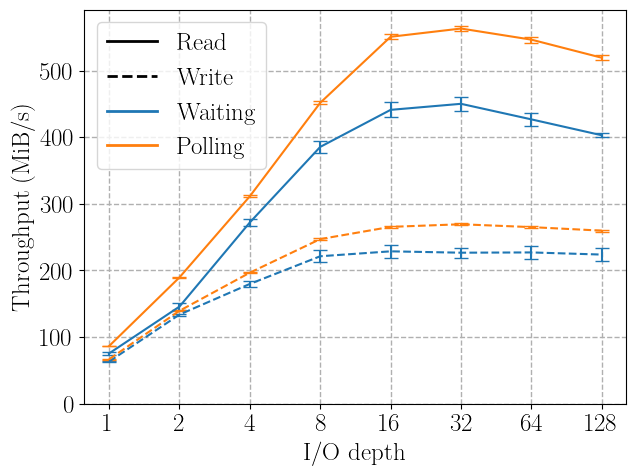

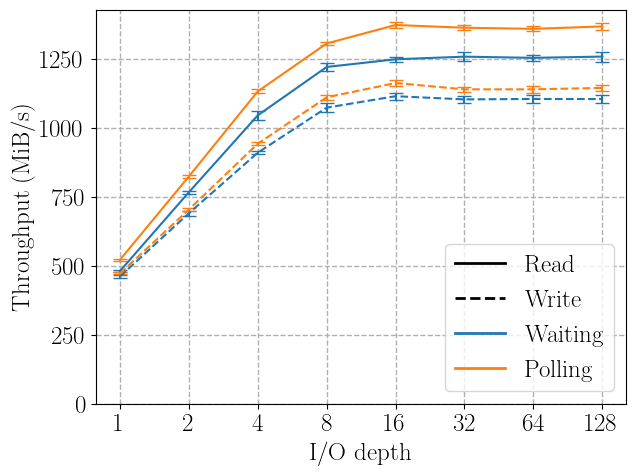

In [60]:
# Experiment 2.1 Virt overhead (waiting vs polling with tmpfs)
# plot_tp(df, {'DPFS-URING-tmpfs-waiting': 'DPFS-KERNEL + tmpfs (waiting)'},
#         ['4k', '16k', '64k'], ['1'],
#         None, {'4k': 'tab:blue', '16k': 'tab:orange', '64k': 'tab:green'}, None,
#         False, OUT+"/DPFS-URING-tmpfs-waiting_tp.pdf")

# plot_tp(df, {'DPFS-URING-tmpfs-polling': 'DPFS-KERNEL + tmpfs (polling)'},
#         ['4k', '16k', '64k'], ['1'],
#         None, {'4k': 'tab:blue', '16k': 'tab:orange', '64k': 'tab:green'}, None,
#         False, OUT+"/DPFS-URING-tmpfs-polling_tp.pdf")

plot_tp(df, {'DPFS-URING-tmpfs-waiting': 'Waiting', 'DPFS-URING-tmpfs-polling': 'Polling'},
             ['4k'], ['1'],
             {'DPFS-URING-tmpfs-waiting': 'tab:blue', 'DPFS-URING-tmpfs-polling': 'tab:orange'}, None, None,
             False, OUT+"/DPFS-URING-tmpfs-4k_tp.pdf")

# plot_tp(df, {'DPFS-URING-tmpfs-waiting': 'Waiting', 'DPFS-URING-tmpfs-polling': 'Polling'},
#              ['16k'], ['1'],
#              {'DPFS-URING-tmpfs-waiting': 'tab:blue', 'DPFS-URING-tmpfs-polling': 'tab:orange'}, None, None,
#              False, OUT+"/DPFS-URING-tmpfs-16k_tp.pdf")

plot_tp(df, {'DPFS-URING-tmpfs-waiting': 'Waiting', 'DPFS-URING-tmpfs-polling': 'Polling'},
             ['64k'], ['1'],
             {'DPFS-URING-tmpfs-waiting': 'tab:blue', 'DPFS-URING-tmpfs-polling': 'tab:orange'}, None, None,
             False, OUT+"/DPFS-URING-tmpfs-64k_tp.pdf")

print((df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-waiting') & (df['QD'] == '128')].reset_index()['bw_avg'] -
    df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-polling') & (df['QD'] == '128')].reset_index()['bw_avg']))
print((df.loc[(df['RW'] == 'randread') & (df['BS'] == '64k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-waiting') & (df['QD'] == '128')].reset_index()['bw_avg'] -
    df.loc[(df['RW'] == 'randread') & (df['BS'] == '64k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-polling') & (df['QD'] == '128')].reset_index()['bw_avg']))

print((df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-waiting') & (df['QD'] == '128')].reset_index()['bw_avg'] -
    df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-polling') & (df['QD'] == '128')].reset_index()['bw_avg']))
print((df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '64k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-waiting') & (df['QD'] == '128')].reset_index()['bw_avg'] -
    df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '64k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-polling') & (df['QD'] == '128')].reset_index()['bw_avg']))

(df.loc[(df['RW'] == 'randread') & ((df['BS'] == '64k') | (df['BS'] == '4k')) & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-polling') & (df['QD'] == '128')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randread') & ((df['BS'] == '64k') | (df['BS'] == '4k')) & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-tmpfs-waiting') & (df['QD'] == '128')].reset_index()['bw_avg']).mean()

0    2.345894
Name: bw_avg, dtype: float64
0    8.649099
Name: bw_avg, dtype: float64
0    2.093902
Name: bw_avg, dtype: float64
0    10.796342
Name: bw_avg, dtype: float64


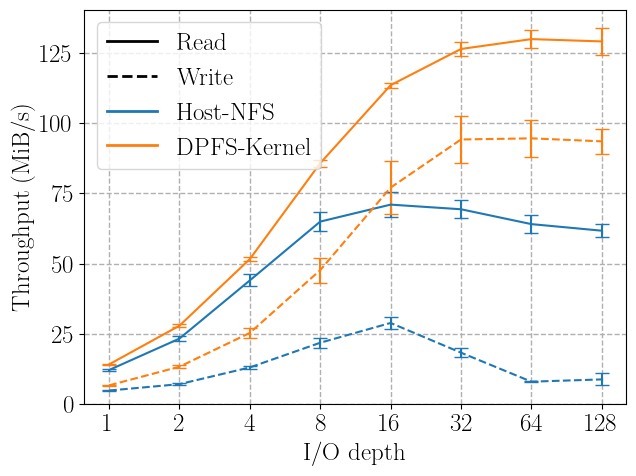

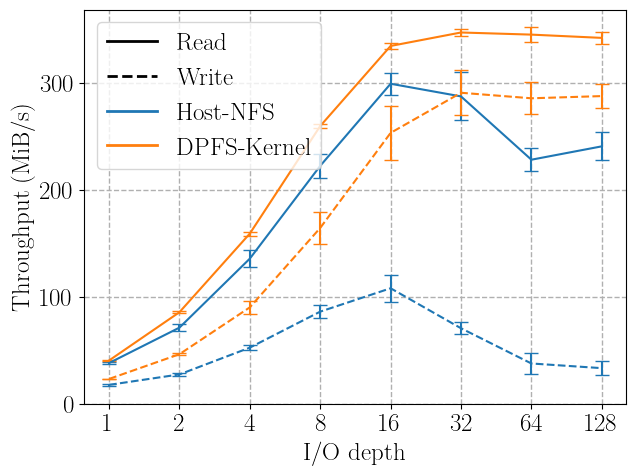

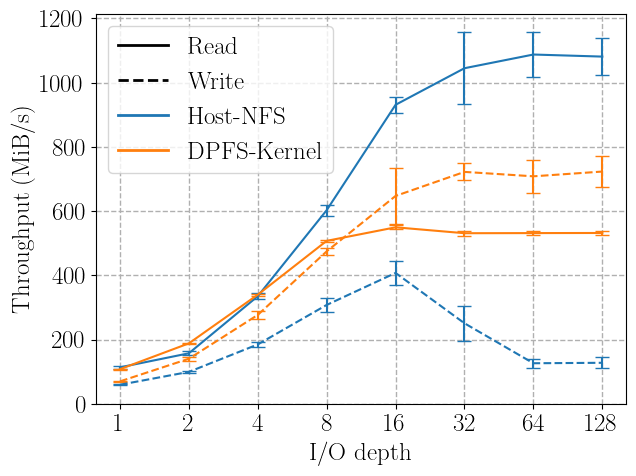

In [10]:
# 2.2 Ceph synthetic (polling)

plot_tp(df, {'Host-NFS-Ceph': 'Host-NFS', 'DPFS-URING-Ceph-polling': 'DPFS-Kernel'},
             ['4k'], ['1'],
             {'Host-NFS-Ceph': 'tab:blue', 'DPFS-URING-Ceph-polling': 'tab:orange'}, None, None,
             False, OUT+"/Ceph-DPFS-vs-NFS-4ktp.pdf")

plot_tp(df, {'Host-NFS-Ceph': 'Host-NFS', 'DPFS-URING-Ceph-polling': 'DPFS-Kernel'},
             ['16k'], ['1'],
             {'Host-NFS-Ceph': 'tab:blue', 'DPFS-URING-Ceph-polling': 'tab:orange'}, None, None,
             False, OUT+"/Ceph-DPFS-vs-NFS-16ktp.pdf")

plot_tp(df, {'Host-NFS-Ceph': 'Host-NFS', 'DPFS-URING-Ceph-polling': 'DPFS-Kernel'},
             ['64k'], ['1'],
             {'Host-NFS-Ceph': 'tab:blue', 'DPFS-URING-Ceph-polling': 'tab:orange'}, None, None,
             False, OUT+"/Ceph-DPFS-vs-NFS-64ktp.pdf")

print((df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '16k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-Ceph-polling') & (df['QD'] == '16')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '16k') & (df['P'] == '1') & (df['conf'] == 'Host-NFS-Ceph') & (df['QD'] == '16')].reset_index()['bw_avg']))
print((df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '16k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-Ceph-polling') & (df['QD'] == '128')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '16k') & (df['P'] == '1') & (df['conf'] == 'Host-NFS-Ceph') & (df['QD'] == '128')].reset_index()['bw_avg']))

print((df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-Ceph-polling') & (df['QD'] == '128')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'Host-NFS-Ceph') & (df['QD'] == '128')].reset_index()['bw_avg']))
print((df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-Ceph-polling') & (df['QD'] == '128')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'Host-NFS-Ceph') & (df['QD'] == '128')].reset_index()['bw_avg']))

1.0684195072516756
0    3.003248
Name: avg, dtype: float64


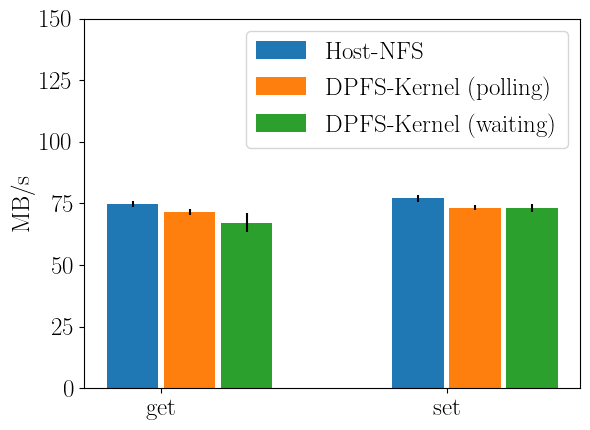

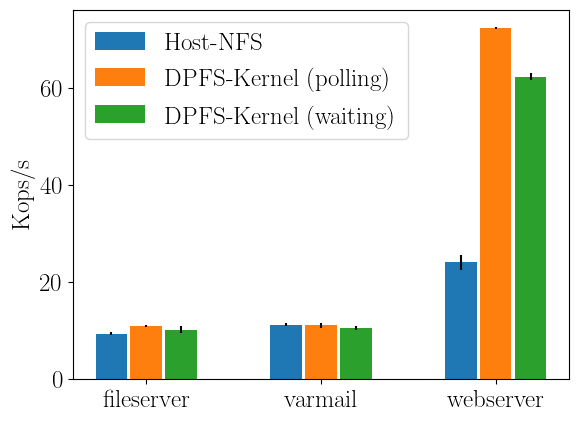

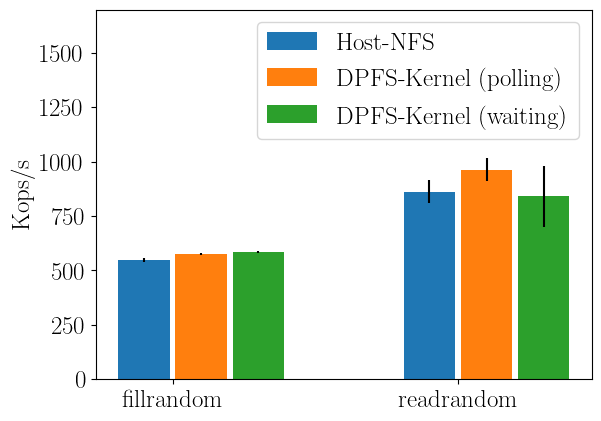

In [13]:
# 2.3 Ceph metadata
plot_bar(df_meta, {'host-NFS-Ceph': 'Host-NFS', 'DPFS-KERNEL (polling)': 'DPFS-Kernel (polling)', 'DPFS-KERNEL (waiting)': 'DPFS-Kernel (waiting)'},
         'redis', OUT+"/redis-NFS-vs-DPFS-KERNEL.pdf", total_width=.4, single_width=.9, ylim=150)
plot_bar(df_meta, {'host-NFS-Ceph': 'Host-NFS', 'DPFS-KERNEL (polling)': 'DPFS-Kernel (polling)', 'DPFS-KERNEL (waiting)': 'DPFS-Kernel (waiting)'},
         'filebench', OUT+"/filebench-NFS-vs-DPFS-KERNEL.pdf", total_width=.6, single_width=.9)
plot_bar(df_meta, {'host-NFS-Ceph': 'Host-NFS', 'DPFS-KERNEL (polling)': 'DPFS-Kernel (polling)', 'DPFS-KERNEL (waiting)': 'DPFS-Kernel (waiting)'},
         'rocksdb', OUT+"/rocksdb-NFS-vs-DPFS-KERNEL.pdf", total_width=.4, single_width=.9, ylim=1700)

print((df_meta.loc[(df_meta['conf'] == 'DPFS-KERNEL (polling)')].reset_index()['avg'] / df_meta.loc[(df_meta['conf'] == 'DPFS-KERNEL (waiting)')].reset_index()['avg']).mean())
print((df_meta.loc[(df_meta['conf'] == 'DPFS-KERNEL (polling)') & (df_meta['type'] == 'webserver')].reset_index()['avg'] / df_meta.loc[(df_meta['conf'] == 'host-NFS-Ceph') & (df_meta['type'] == 'webserver')].reset_index()['avg']))

## Experiment 3 RVFS

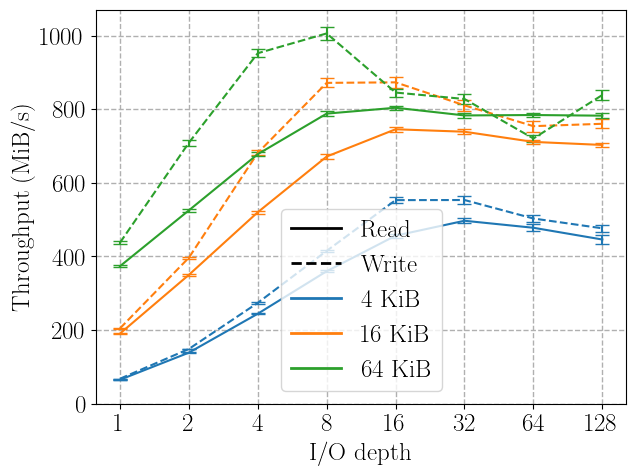

In [14]:
# 3.1
plot_tp(df, {'DPFS-RVFS-null': 'DPFS-RVFS null'}, ['4k', '16k', '64k'], ['1'],
             None, {'4k': 'tab:blue', '16k': 'tab:orange', '64k': 'tab:green'}, None,
             False, OUT+"/RVFS-null-T1-tp.pdf")

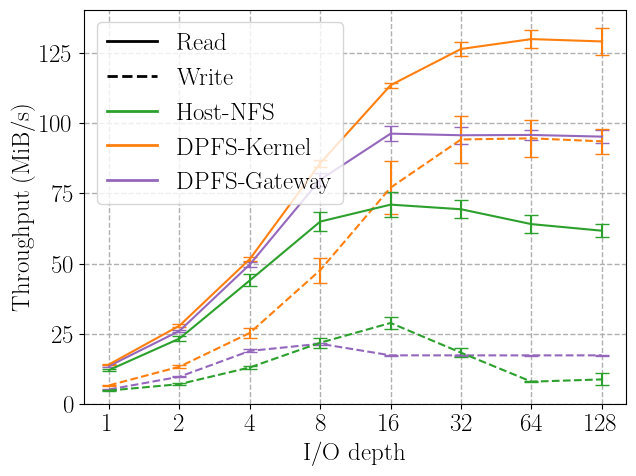

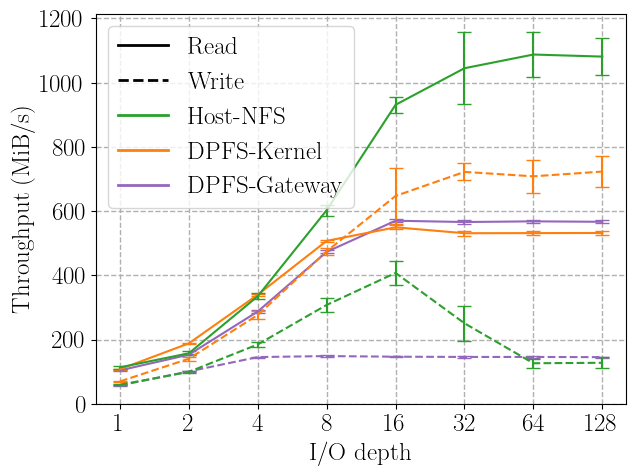

In [14]:
plot_tp(df, {'DPFS-RVFS-Ceph-T1': 'DPFS-Gateway', 'DPFS-URING-Ceph-polling': 'DPFS-Kernel', 'Host-NFS-Ceph': 'Host-NFS'}, ['4k'], ['1'],
            {'Host-NFS-Ceph': 'tab:green', 'DPFS-URING-Ceph-polling': 'tab:orange', 'DPFS-RVFS-Ceph-T1': 'tab:purple'}, None, None,
             False, OUT+"/RVFS-Ceph-TX-4ktp.pdf")

plot_tp(df, {'DPFS-RVFS-Ceph-T1': 'DPFS-Gateway', 'DPFS-URING-Ceph-polling': 'DPFS-Kernel', 'Host-NFS-Ceph': 'Host-NFS'}, ['64k'], ['1'],
            {'Host-NFS-Ceph': 'tab:green', 'DPFS-URING-Ceph-polling': 'tab:orange', 'DPFS-RVFS-Ceph-T1': 'tab:purple'}, None, None,
             False, OUT+"/RVFS-Ceph-TX-64ktp.pdf")

In [21]:
print((df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-RVFS-Ceph-T1') & (df['QD'] == '128')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-RVFS-Ceph-T1') & (df['QD'] == '128')].reset_index()['bw_avg']))

print((df.loc[(df['RW'] == 'randread') & (df['BS'] == '64k') & (df['P'] == '1') & (df['conf'] == 'DPFS-RVFS-Ceph-T1') & (df['QD'] == '128')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randwrite') & (df['BS'] == '64k') & (df['P'] == '1') & (df['conf'] == 'DPFS-RVFS-Ceph-T1') & (df['QD'] == '128')].reset_index()['bw_avg']))

print((df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-Ceph-polling') & (df['QD'] == '128')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-RVFS-Ceph-T1') & (df['QD'] == '128')].reset_index()['bw_avg']))
print((df.loc[(df['RW'] == 'randread') & (df['BS'] == '64k') & (df['P'] == '1') & (df['conf'] == 'DPFS-RVFS-Ceph-T1') & (df['QD'] == '128')].reset_index()['bw_avg'] /
    df.loc[(df['RW'] == 'randread') & (df['BS'] == '64k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-Ceph-polling') & (df['QD'] == '128')].reset_index()['bw_avg']))

0    5.521063
Name: bw_avg, dtype: float64
0    3.905761
Name: bw_avg, dtype: float64
0    1.356419
Name: bw_avg, dtype: float64
0    1.065494
Name: bw_avg, dtype: float64


                         conf   workload        type         avg       stdev
7   DPFS-RVFS-Ceph-T1-polling      redis         get   74.367140    0.452447
8   DPFS-RVFS-Ceph-T1-polling      redis         set   76.654814    0.629832
9   DPFS-RVFS-Ceph-T1-polling    rocksdb  fillrandom  582.422600    4.171093
10  DPFS-RVFS-Ceph-T1-polling    rocksdb  readrandom  816.749200  182.134731
11  DPFS-RVFS-Ceph-T1-polling  filebench  fileserver    5.435808    0.038571
12  DPFS-RVFS-Ceph-T1-polling  filebench     varmail    8.441629    0.680394
13  DPFS-RVFS-Ceph-T1-polling  filebench   webserver  152.679995    0.584038


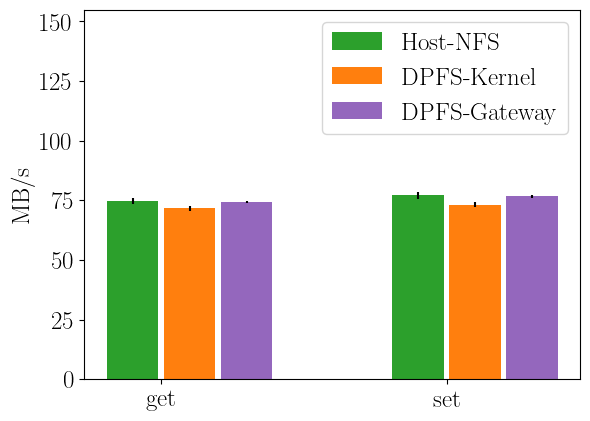

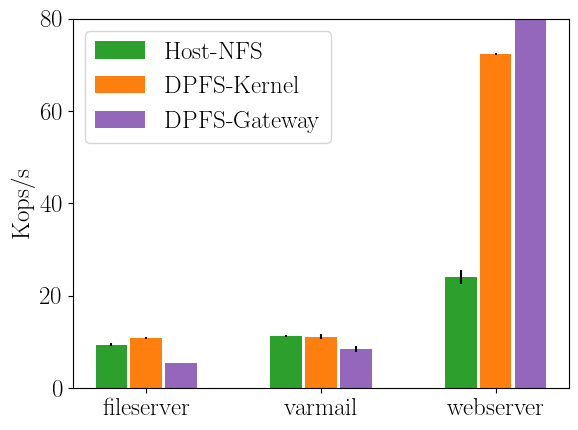

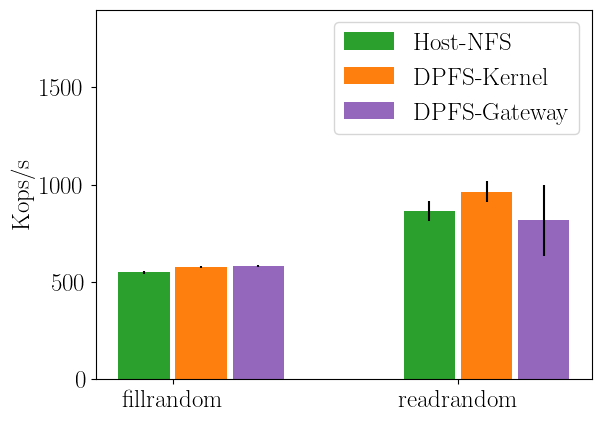

In [16]:
plot_bar(df_meta, {'host-NFS-Ceph': 'Host-NFS', 'DPFS-KERNEL (polling)': 'DPFS-Kernel', 'DPFS-RVFS-Ceph-T1-polling': 'DPFS-Gateway'},
         'redis', OUT+"/redis-DPFS-RVFS.pdf", colors={'host-NFS-Ceph': 'tab:green', 'DPFS-KERNEL (polling)': 'tab:orange', 'DPFS-RVFS-Ceph-T1-polling': 'tab:purple'}, total_width=.4, single_width=.9, ylim=155)
plot_bar(df_meta, {'host-NFS-Ceph': 'Host-NFS', 'DPFS-KERNEL (polling)': 'DPFS-Kernel', 'DPFS-RVFS-Ceph-T1-polling': 'DPFS-Gateway'},
         'filebench', OUT+"/filebench-DPFS-RVFS.pdf", colors={'host-NFS-Ceph': 'tab:green', 'DPFS-KERNEL (polling)': 'tab:orange', 'DPFS-RVFS-Ceph-T1-polling': 'tab:purple'}, total_width=.6, single_width=.9, ylim=80)
plot_bar(df_meta, {'host-NFS-Ceph': 'Host-NFS', 'DPFS-KERNEL (polling)': 'DPFS-Kernel', 'DPFS-RVFS-Ceph-T1-polling': 'DPFS-Gateway'},
         'rocksdb', OUT+"/rocksdb-DPFS-RVFS.pdf", colors={'host-NFS-Ceph': 'tab:green', 'DPFS-KERNEL (polling)': 'tab:orange', 'DPFS-RVFS-Ceph-T1-polling': 'tab:purple'}, total_width=.4, single_width=.9, ylim=1900)

print(df_meta.loc[(df_meta['conf'] == 'DPFS-RVFS-Ceph-T1-polling')])

## Experiment 4 Multi-tenancy

/Users/eoo/IBM/Code/SNAP-dpu-virtio-fs/mlnx-snap-3.5.0/dpu-virtio-fs/experiments/results/dpfs.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_data['bw_avg'] = tp_data['bw_avg'] / 1024.0
/Users/eoo/IBM/Code/SNAP-dpu-virtio-fs/mlnx-snap-3.5.0/dpu-virtio-fs/experiments/results/dpfs.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_data['bw_stdev'] = tp_data['bw_stdev'] / 1024.0
/Users/eoo/IBM/Code/SNAP-dpu-virtio-fs/mlnx-snap-3.5.0/dpu-virtio-fs/experiments/results/dpfs.py:270: SettingWithCopyW

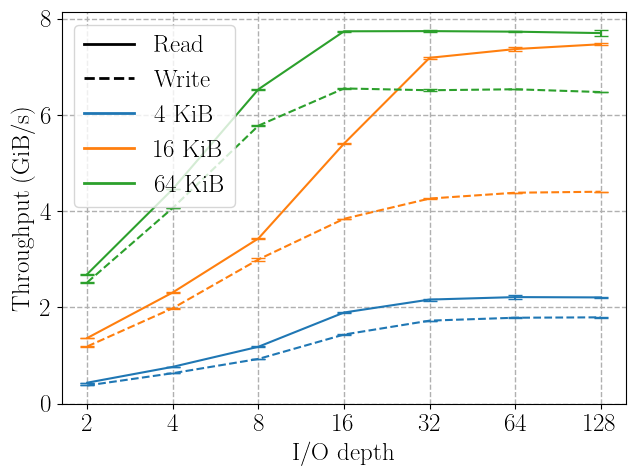

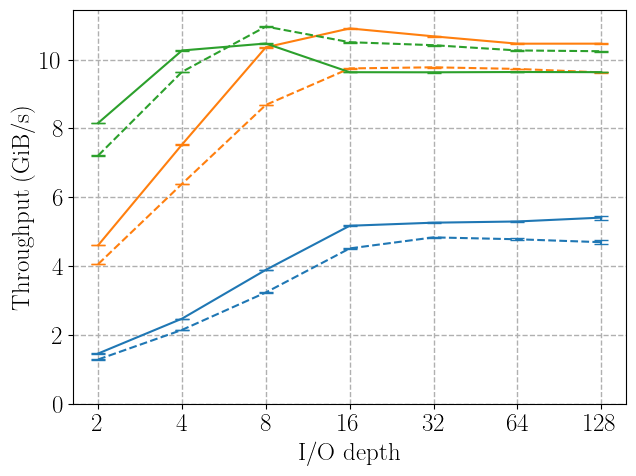

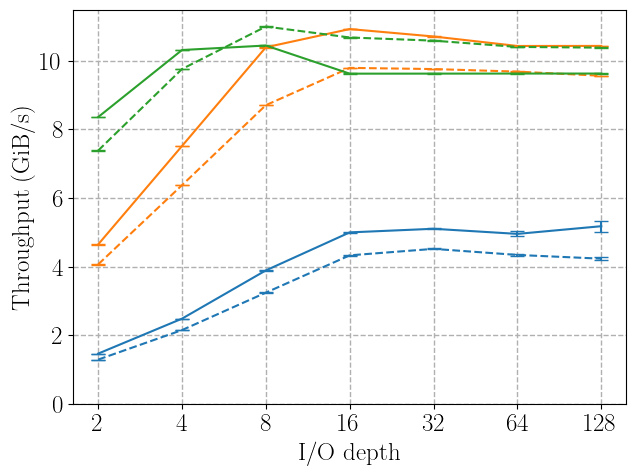

In [4]:
plot_tp(df_mt.loc[(df_mt['T'] == '2') & (df_mt['MT'] == '2')], {'DPFS-NULL': 'DPFS-NULL'}, ['4k', '16k', '64k'], ['1'],
             None, {'4k': 'tab:blue', '16k': 'tab:orange', '64k': 'tab:green'}, None,
             True, OUT+"/MT-NULL-T2-2.pdf")

plot_tp(df_mt.loc[(df_mt['T'] == '4') & (df_mt['MT'] == '8')], {'DPFS-NULL': 'DPFS-NULL'}, ['4k', '16k', '64k'], ['1'],
             None, {'4k': 'tab:blue', '16k': 'tab:orange', '64k': 'tab:green'}, None,
             True, OUT+"/MT-NULL-T4-8.pdf", legend_none=True)

plot_tp(df_mt.loc[(df_mt['T'] == '8') & (df_mt['MT'] == '8')], {'DPFS-NULL': 'DPFS-NULL'}, ['4k', '16k', '64k'], ['1'],
             None, {'4k': 'tab:blue', '16k': 'tab:orange', '64k': 'tab:green'}, None,
             True, OUT+"/MT-NULL-T8-8.pdf", legend_none=True)

In [18]:
print(df_mt.loc[(df_mt['RW'] == 'randread') & (df_mt['BS'] == '4k') & (df_mt['P'] == '1') & (df_mt['conf'] == 'DPFS-NULL') & (df_mt['QD'] == '128') & (df_mt['T'] == '4')])
print(df_mt.loc[(df_mt['RW'] == 'randwrite') & (df_mt['BS'] == '4k') & (df_mt['P'] == '1') & (df_mt['conf'] == 'DPFS-NULL') & (df_mt['QD'] == '128') & (df_mt['T'] == '4')])
print(df_mt.loc[(df_mt['RW'] == 'randread') & (df_mt['BS'] == '16k') & (df_mt['P'] == '1') & (df_mt['conf'] == 'DPFS-NULL') & (df_mt['QD'] == '16') & (df_mt['T'] == '4')])
print(df_mt.loc[(df_mt['RW'] == 'randwrite') & (df_mt['BS'] == '64k') & (df_mt['P'] == '1') & (df_mt['conf'] == 'DPFS-NULL') & (df_mt['QD'] == '8') & (df_mt['T'] == '4')])
print(df_mt.loc[(df_mt['RW'] == 'randread') & (df_mt['BS'] == '4k') & (df_mt['P'] == '1') & (df_mt['conf'] == 'DPFS-NULL') & (df_mt['QD'] == '128') & (df_mt['T'] == '8')])
print(df_mt.loc[(df_mt['RW'] == 'randwrite') & (df_mt['BS'] == '4k') & (df_mt['P'] == '1') & (df_mt['conf'] == 'DPFS-NULL') & (df_mt['QD'] == '128') & (df_mt['T'] == '8')])

         conf        RW  BS   QD  P    IOPS_avg    IOPS_stdev   clat_avg  \
96  DPFS-NULL  randread  4k  128  1  1062808.03   2400.958412  478.16500   
97  DPFS-NULL  randread  4k  128  1  1417345.06  14399.478325  721.41125   

   clat_stdev       bw_avg   bw_stdev  T MT  
96    4.33234  4151.590000   9.376856  4  4  
97  59.924598  5536.504648  56.247964  4  8  
          conf         RW  BS   QD  P    IOPS_avg    IOPS_stdev   clat_avg  \
138  DPFS-NULL  randwrite  4k  128  1   849714.98   2110.205297  599.05750   
139  DPFS-NULL  randwrite  4k  128  1  1230236.72  14235.790793  832.99625   

    clat_stdev       bw_avg   bw_stdev  T MT  
138   5.955772  3319.199053   8.242877  4  4  
139  82.596644  4805.612900  55.608556  4  8  
          conf        RW   BS  QD  P   IOPS_avg   IOPS_stdev  clat_avg  \
104  DPFS-NULL  randread  16k  16  1  606068.39  1547.424567    101.54   
105  DPFS-NULL  randread  16k  16  1  714558.13   662.516226    174.03   

    clat_stdev    bw_avg   bw_stde

/Users/eoo/IBM/Code/SNAP-dpu-virtio-fs/mlnx-snap-3.5.0/dpu-virtio-fs/experiments/results/dpfs.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_data['bw_avg'] = tp_data['bw_avg'] / 1024.0
/Users/eoo/IBM/Code/SNAP-dpu-virtio-fs/mlnx-snap-3.5.0/dpu-virtio-fs/experiments/results/dpfs.py:326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_data['bw_stdev'] = tp_data['bw_stdev'] / 1024.0


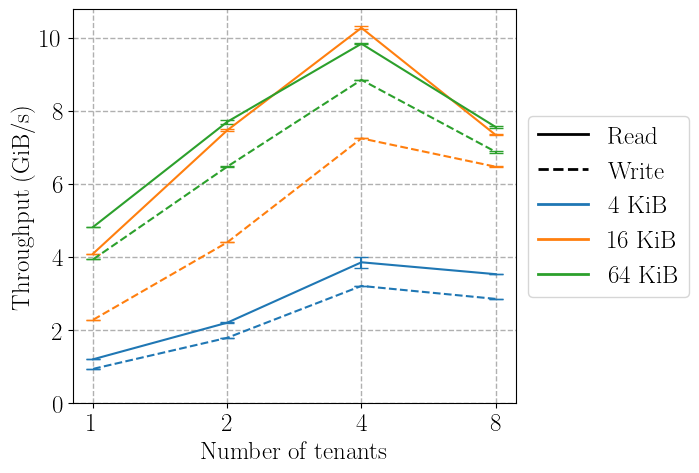

In [19]:
plot_tp_mt(df_mt, {'DPFS-NULL': 'DPFS-NULL'},
           '128', '1', '2', ['4k', '16k', '64k'],
           None, {'4k': 'tab:blue', '16k': 'tab:orange', '64k': 'tab:green'},
           True, OUT+"/MT-NULL-2-X.pdf", legend_outside=True)

In [20]:
print(df_mt.loc[(df_mt['RW'] == 'randread') & (df_mt['BS'] == '4k') & (df_mt['P'] == '1') & (df_mt['conf'] == 'DPFS-KERNEL-Ceph') & (df_mt['QD'] == '128') & (df_mt['T'] == '4')])
print(df.loc[(df['RW'] == 'randread') & (df['BS'] == '4k') & (df['P'] == '1') & (df['conf'] == 'DPFS-URING-Ceph-polling') & (df['QD'] == '128')])


               conf        RW  BS   QD  P  IOPS_avg   IOPS_stdev   clat_avg  \
6  DPFS-KERNEL-Ceph  randread  4k  128  1  37760.19  4414.187346  113000.93   

      clat_stdev      bw_avg   bw_stdev  T MT  
6  105272.274183  147.501348  17.242961  4  8  
                        conf        RW  BS   QD  P  IOPS_avg  IOPS_stdev  \
151  DPFS-URING-Ceph-polling  randread  4k  128  1  33077.18     1249.14   

     clat_avg  clat_stdev      bw_avg  bw_stdev  
151   3865.02     1488.46  129.207812  4.879443  
